In [147]:
import pandas as pd
import numpy as np

from statsmodels.tsa.stattools import acf,pacf,adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
coke = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [4]:
coke.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
coke.tail()


,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [11]:
coke.shape

(42, 2)

In [ ]:
period = range()

In [31]:
data = pd.date_range('1986-03-31','1996-06-30', periods=len(coke))

In [32]:
len(data)

42

In [47]:
coke['Quarter'] = data

In [48]:
coke['Quarter'] = coke['Quarter'].dt.date

In [45]:
coke

,Quarter,Sales
0,1986-03-31,1734.827000
1,1986-06-30,2244.960999
2,1986-09-29,2533.804993
3,1986-12-29,2154.962997
4,1987-03-31,1547.818996
5,1987-06-30,2104.411995
6,1987-09-29,2014.362999
7,1987-12-30,1991.746998
8,1988-03-30,1869.049999
9,1988-06-29,2313.631996


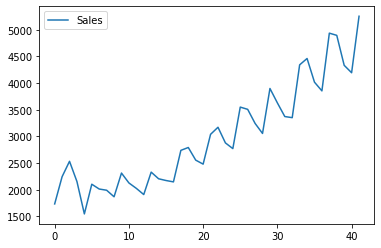

In [49]:
coke.plot()

plt.show()

In [52]:
coke.set_index('Quarter',inplace=True)

In [53]:
coke.head()

,Sales
Quarter,
1986-03-31,1734.827000
1986-06-30,2244.960999
1986-09-29,2533.804993
1986-12-29,2154.962997
1987-03-31,1547.818996


In [59]:
def PlottingGraph(data):
    rollingMean = data.rolling(4).mean()
    rollingStd = data.rolling(4).std()
    
    # plotting trend Data
    plt.figure(figsize=(19,9))
    plt.plot(data,color='blue',label='Data')
    plt.plot(rollingMean,color='red',label='Mean')
    plt.plot(rollingStd,color='green',label='STD')
    plt.title('Trend Analysis')
    plt.legend(loc='best')
    plt.show()
    
    NonRollingMeanData = data-rollingMean
    
    NonRollingMeanDataRollingMean = NonRollingMeanData.rolling(4).mean()
    NonRollingMeanDataRollingStd = NonRollingMeanData.rolling(4).std()
    #Plotting Stationarity
    plt.figure(figsize=(19,9))
    plt.plot(NonRollingMeanData,color='blue',label='Data')
    plt.plot(NonRollingMeanDataRollingMean,color='Red',label='Mean')
    plt.plot(NonRollingMeanDataRollingStd,color='green',label='STD')
    plt.title('NonRollingMeanData (Statinary Analysis)')
    plt.legend(loc='best')
    plt.show()

In [66]:
def StationaryCriticalValueCheck(data,window=12):
    
    fuller = adfuller(data,autolag='AIC')
    print()
    print()
    print('Statistics Value',fuller[0])
    print('P Value',fuller[1])
    print('No. of Lags',fuller[2])
    print('No. of Observation Used',fuller[3])
    
    for key,values in fuller[4].items():
        print(key,"\t",values)

In [67]:
logData = np.log(coke)

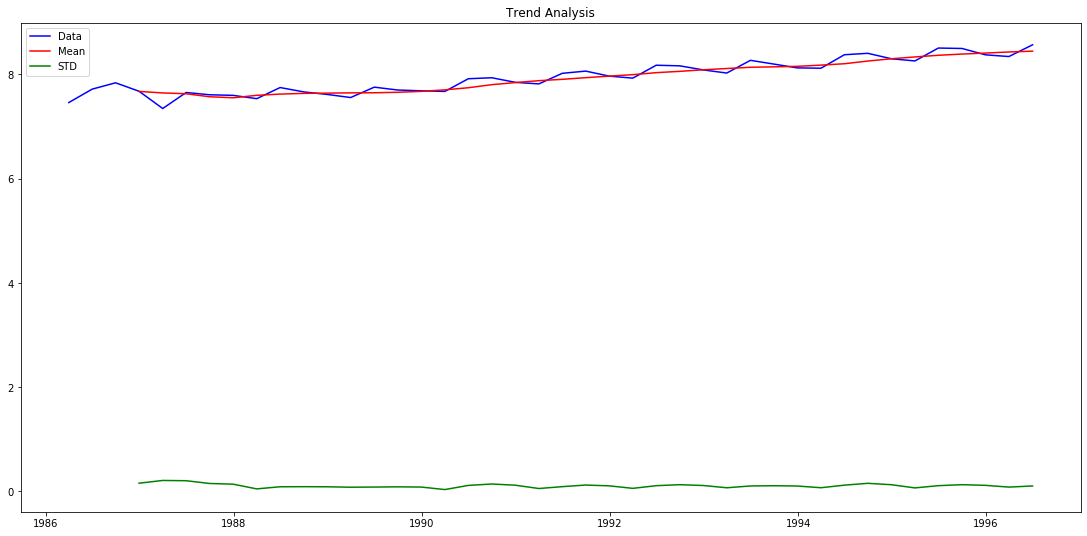

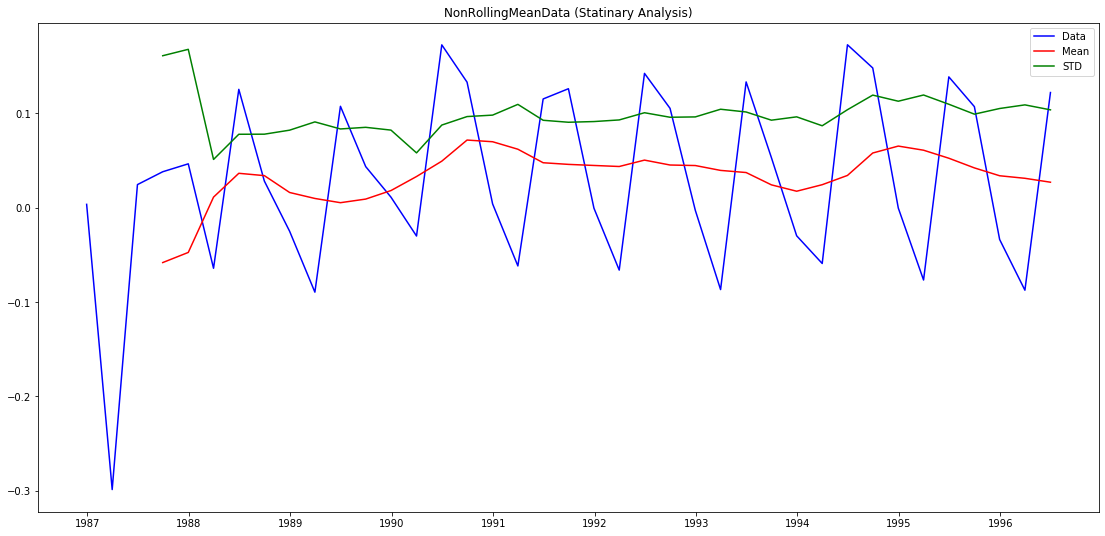

In [68]:
PlottingGraph(logData)

In [70]:
StationaryCriticalValueCheck(logData)



Statistics Value 0.19282043859067285
P Value 0.9718560271303518
No. of Lags 6
No. of Observation Used 35
1% 	 -3.6327426647230316
5% 	 -2.9485102040816327
10% 	 -2.6130173469387756


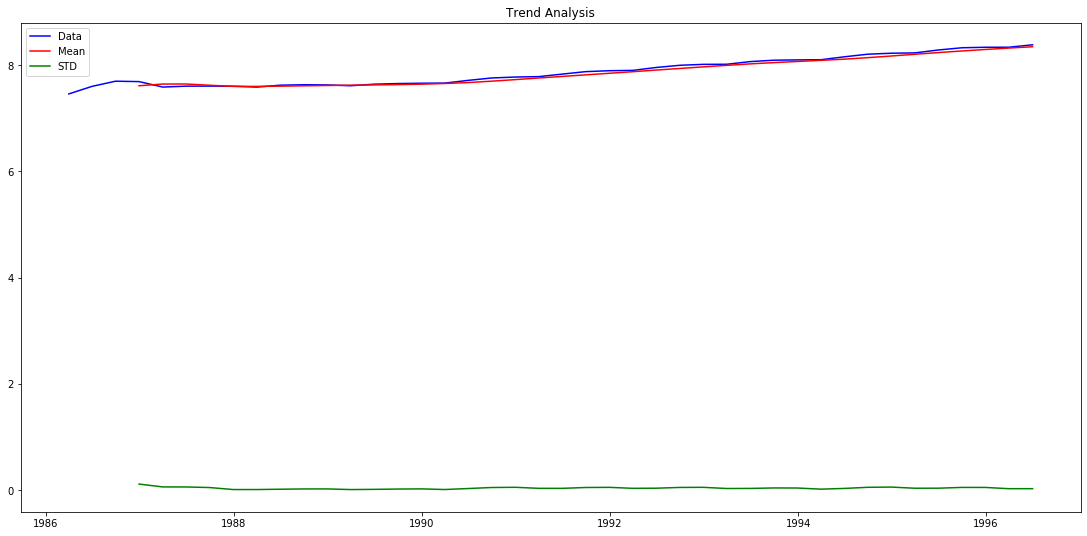

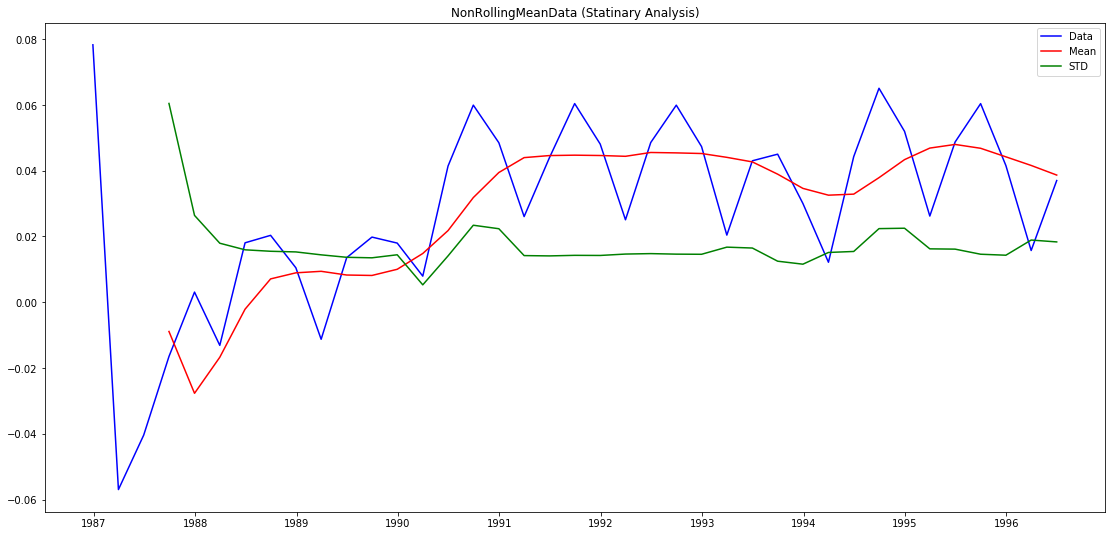

In [69]:
ewm= logData.ewm(4).mean()

PlottingGraph(ewm)

In [71]:
StationaryCriticalValueCheck(ewm)



Statistics Value -0.4164267344323727
P Value 0.9073197619905469
No. of Lags 8
No. of Observation Used 33
1% 	 -3.6461350877925254
5% 	 -2.954126991123355
10% 	 -2.6159676124885216


In [72]:
shiftData = logData.shift()

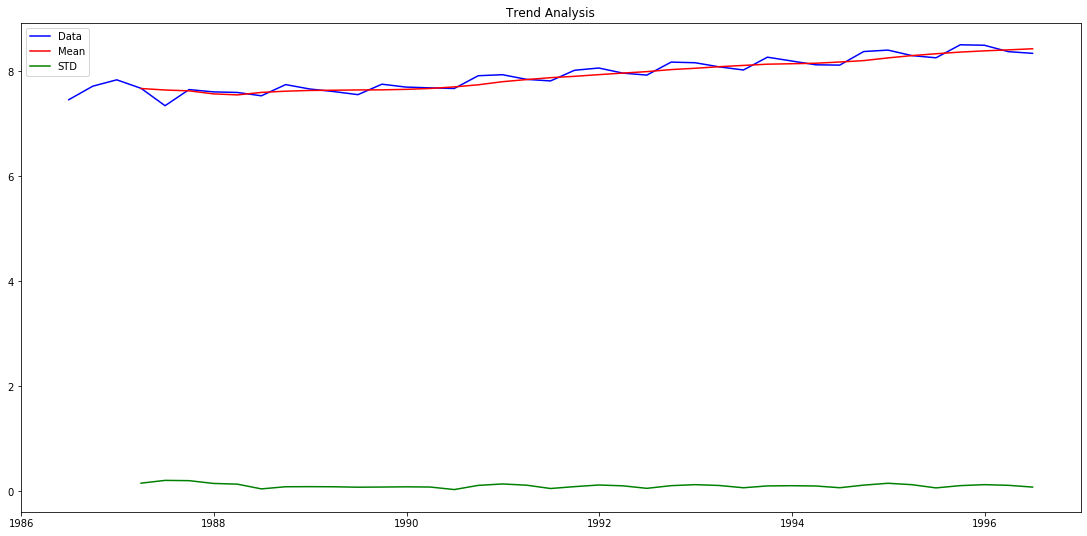

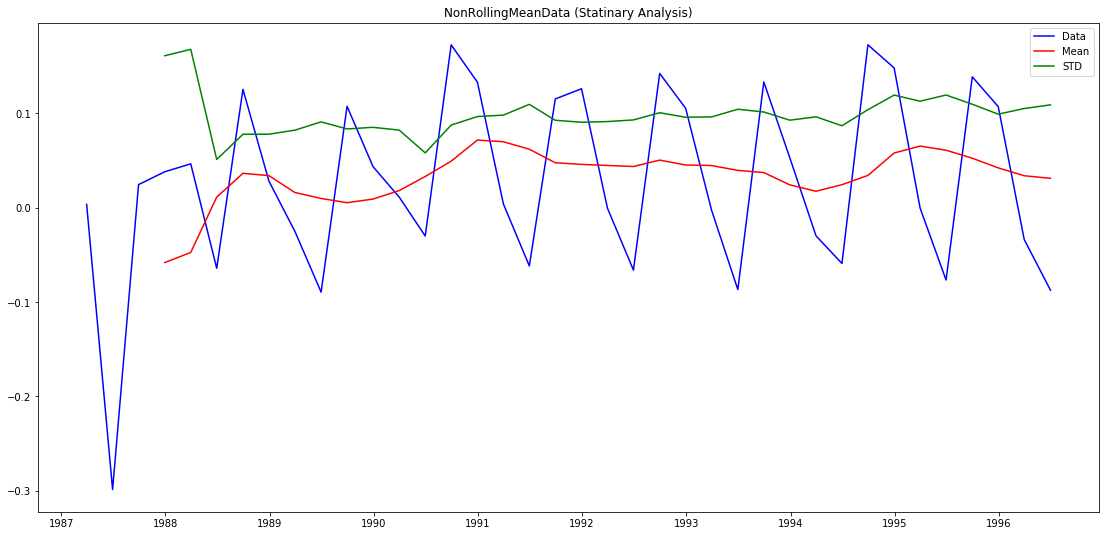

In [73]:
PlottingGraph(shiftData)

In [76]:
I = logData - shiftData
I = I.dropna()
StationaryCriticalValueCheck(I)



Statistics Value -3.190392315504826
P Value 0.020547588878929202
No. of Lags 6
No. of Observation Used 34
1% 	 -3.639224104416853
5% 	 -2.9512301791166293
10% 	 -2.614446989619377


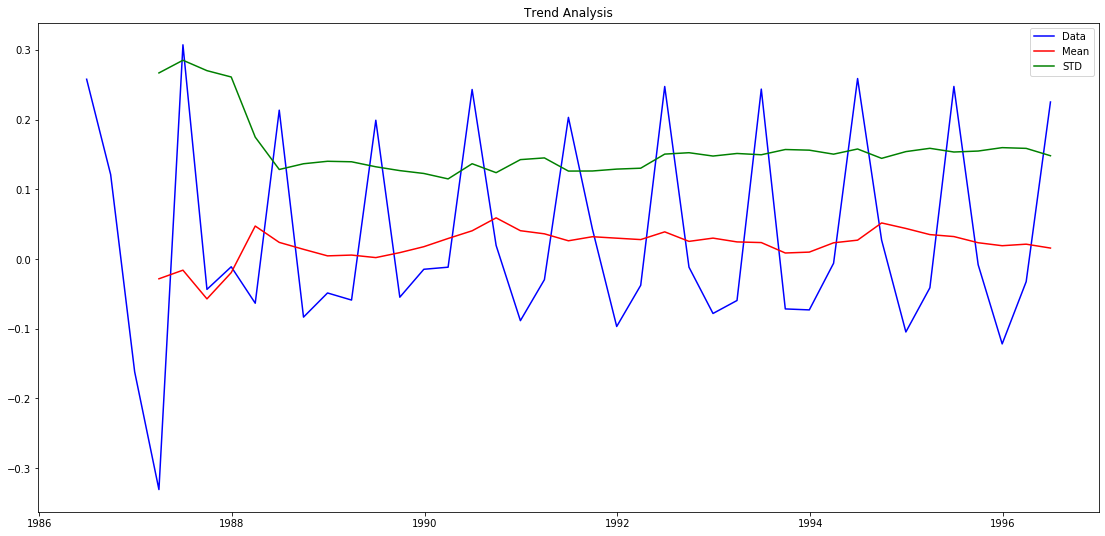

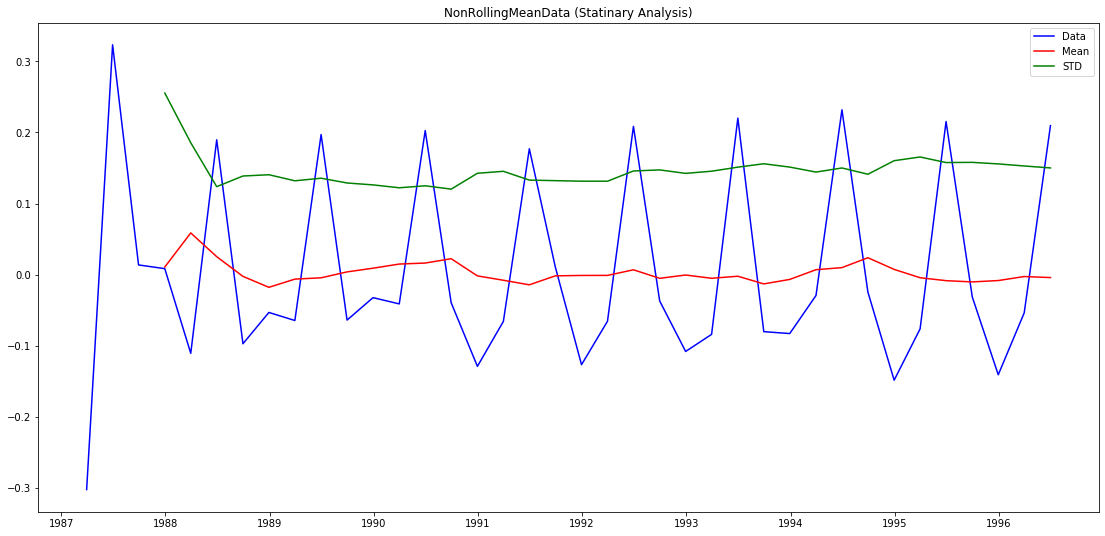

In [82]:
PlottingGraph(I)

In [86]:
decompose = seasonal_decompose(logData,period=4)

In [87]:
seasonality = decompose.seasonal
trend = decompose.trend
residual = decompose.resid

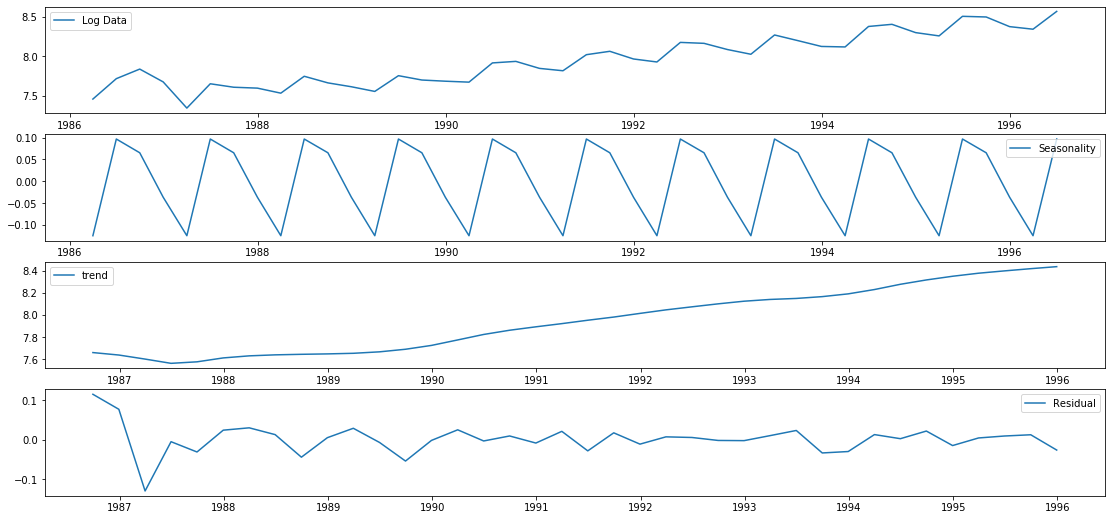

In [88]:
plt.figure(figsize=(19,9))

plt.subplot(411)
plt.plot(logData,label='Log Data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(seasonality,label='Seasonality')
plt.legend(loc='best')


plt.subplot(413)
plt.plot(trend,label='trend')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

plt.show()

In [89]:
residual = residual.dropna()

StationaryCriticalValueCheck(residual)



Statistics Value -4.137601280788691
P Value 0.0008388312480391659
No. of Lags 7
No. of Observation Used 30
1% 	 -3.6699197407407405
5% 	 -2.9640707407407407
10% 	 -2.621171111111111


In [91]:
acfData = acf(logData,20)
pacfData = pacf(logData,20,'OLS')

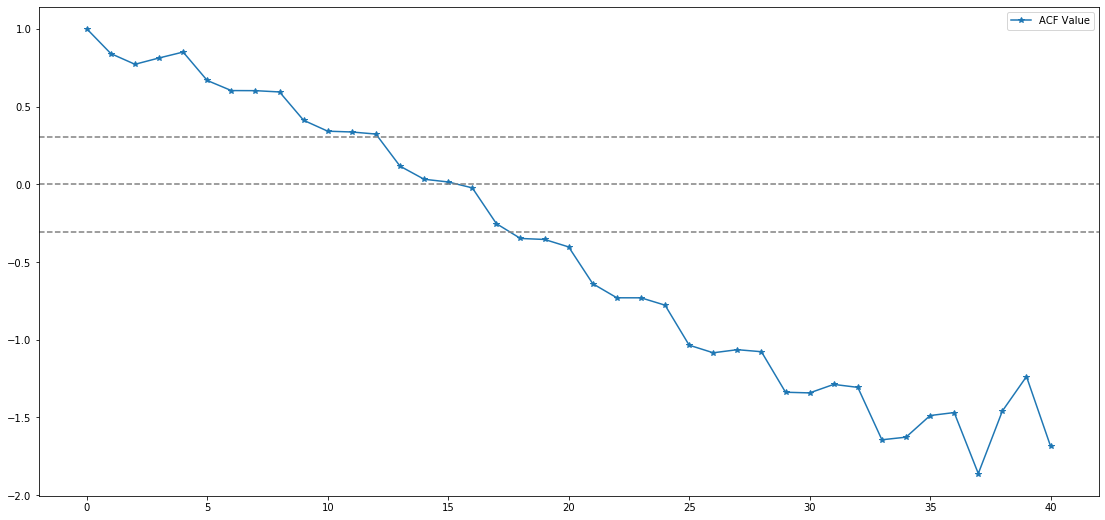

In [92]:
plt.figure(figsize=(19,9))

plt.plot(acfData,label='ACF Value',marker='*')

plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(I)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(I)),linestyle='--',color='gray')

#plt.xticks(ticks=[0,1,2,3])

plt.legend(loc='best')
plt.show()

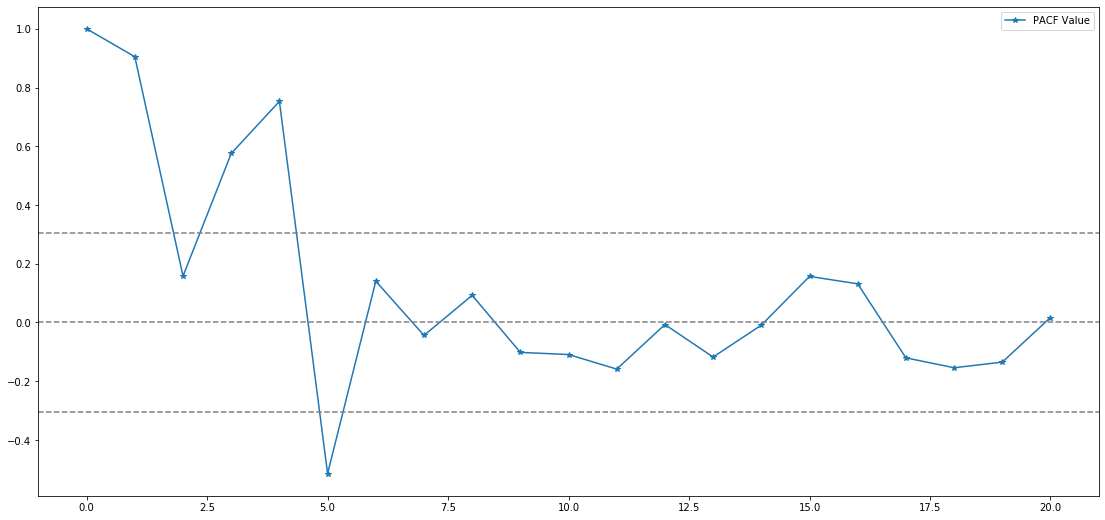

In [93]:
plt.figure(figsize=(19,9))

plt.plot(pacfData,label='PACF Value',marker='*')

plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(I)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(I)),linestyle='--',color='gray')

#plt.xticks(ticks=[0,1,2,3])

plt.legend(loc='best')
plt.show()

In [184]:
arima = ARIMA(logData,order=(5,1,1))

In [185]:
fitted_arima = arima.fit(disp=-1)

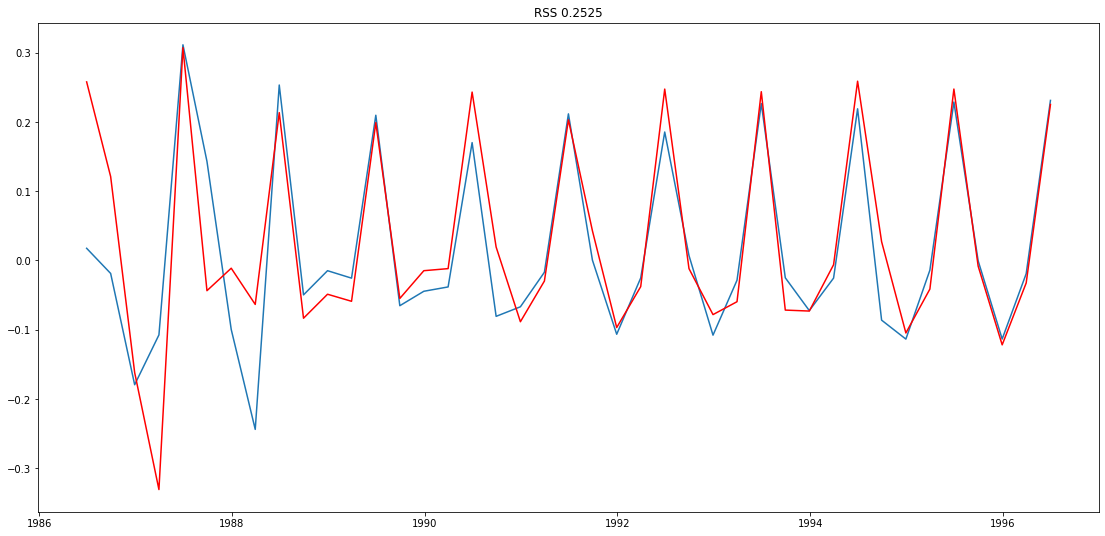

In [186]:
plt.figure(figsize=(19,9))
plt.plot(fitted_arima.fittedvalues)
plt.plot(I,color='Red',label='I')

plt.title('RSS %.4f'%sum((fitted_arima.fittedvalues-I['Sales'])**2))

plt.show()

In [187]:
fitted_series = pd.Series(fitted_arima.fittedvalues,copy=True)

fitted_series.head()

Quarter
1986-06-30    0.017477
1986-09-29   -0.018850
1986-12-29   -0.179538
1987-03-31   -0.107581
1987-06-30    0.311336
dtype: float64

In [188]:
fitted_series = fitted_series.cumsum()

fitted_series.head()

Quarter
1986-06-30    0.017477
1986-09-29   -0.001373
1986-12-29   -0.180911
1987-03-31   -0.288491
1987-06-30    0.022844
dtype: float64

In [189]:
fitted_logData = pd.Series(logData.iloc[0:,0:].values.flatten(),index=coke.index)

fitted_logData = fitted_logData.add(fitted_series,fill_value = 0)

In [190]:
fitted_logData.head()

Quarter
1986-03-31    7.458663
1986-06-30    7.733920
1986-09-29    7.836104
1986-12-29    7.494618
1987-03-31    7.056111
dtype: float64

In [191]:
fitted_logData = np.exp(fitted_logData)

fitted_logData.head()

Quarter
1986-03-31    1734.827000
1986-06-30    2284.540898
1986-09-29    2530.328638
1986-12-29    1798.337638
1987-03-31    1159.925022
dtype: float64

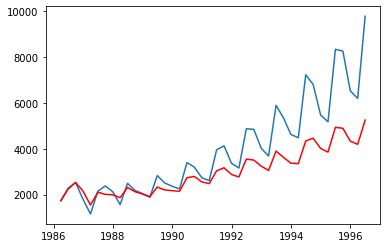

In [192]:
plt.plot(fitted_logData)
plt.plot(coke,color = 'Red')



Text(0.5, 1.0, 'RSME 1447.6733')

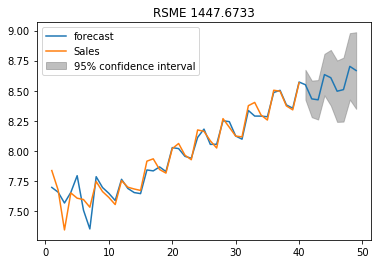

In [193]:
fitted_arima.plot_predict(2,50)

plt.title('RSME %.4f'% np.sqrt(sum((fitted_logData - coke['Sales'])**2)/len(coke)))